In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('stroke-data.csv')
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
dataset.replace('Yes', 1, inplace=True)
dataset.replace('No', 0, inplace=True)
dataset = dataset[dataset.bmi >= 0]
dataset = dataset[dataset.smoking_status != "Unknown"]
dataset.reset_index(inplace=True)
gender = pd.get_dummies(dataset.gender)
work_type = pd.get_dummies(dataset.work_type)
Residence_type = pd.get_dummies(dataset.Residence_type)
smoking_status = pd.get_dummies(dataset.smoking_status)

In [5]:
dataset.drop(columns=["index", "id", "gender", "work_type", "Residence_type", "smoking_status"], inplace = True)
dataset = pd.concat([dataset.iloc[:, 0], dataset.iloc[:, 5], dataset.iloc[:, 1:4], gender, work_type, Residence_type, smoking_status, dataset.iloc[:, 6]], axis=1,)

In [6]:
stroke = dataset.iloc[:, 18]
dataset.drop(columns=["stroke"], inplace=True)

In [7]:
dataset.iloc[:, 0:2] = StandardScaler().fit_transform(dataset.iloc[:, 0:2])
dataset

,age,bmi,hypertension,heart_disease,ever_married,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
0,0.973768,0.864982,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0
1,1.663479,0.302945,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,0.018784,0.563401,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,1.610424,-0.862253,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0
4,1.716533,-0.176842,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1.769588,-0.272800,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0
3422,0.443222,-1.177542,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
3423,1.716533,1.331062,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0
3424,-0.723981,0.042489,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0


In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset)
principalDF = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])

In [9]:
finalDF = pd.concat([principalDF, stroke], axis=1)
finalDF

,pc1,pc2,stroke
0,1.425089,0.188460,1
1,1.496333,-0.521314,1
2,0.282707,0.516421,1
3,1.035032,-1.621825,1
4,1.448702,-1.031425,1
...,...,...,...
3421,1.533064,-1.217163,0
3422,-0.350302,-1.145292,0
3423,2.147093,0.188105,0
3424,-0.476272,0.293714,0


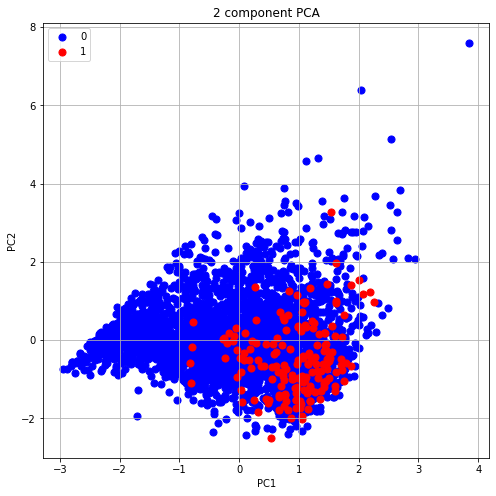

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('2 component PCA')
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indices = finalDF['stroke'] == target
    ax.scatter(finalDF.loc[indices, 'pc1'], finalDF.loc[indices, 'pc2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       817
           1       0.12      0.72      0.20        40

    accuracy                           0.74       857
   macro avg       0.55      0.73      0.52       857
weighted avg       0.94      0.74      0.81       857



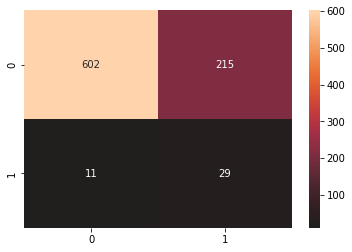

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import pprint
from sklearn import metrics
import numpy as np
import seaborn as sns

x_train, x_test, y_train, y_test = train_test_split(dataset, stroke, random_state=0)
svm_model_scaled = SVC(class_weight = "balanced")
svm_model_scaled.fit(x_train, y_train)
y_pred = svm_model_scaled.predict(x_test)

svccm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

svchm = sns.heatmap(svccm, center = True, annot=True, fmt='g', square=False)



              precision    recall  f1-score   support

           0       0.96      1.00      0.98       817
           1       0.60      0.07      0.13        40

    accuracy                           0.95       857
   macro avg       0.78      0.54      0.55       857
weighted avg       0.94      0.95      0.94       857

[[815   2]
 [ 37   3]]


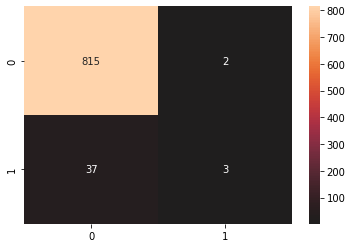

In [12]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier



rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

rfccm = confusion_matrix(y_test, rfc_pred)
print(classification_report(y_test, rfc_pred))
print (rfccm)

rfchm = sns.heatmap(rfccm, center = True, annot=True, fmt='g', square=False)


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       817
           1       0.50      0.03      0.05        40

    accuracy                           0.95       857
   macro avg       0.73      0.51      0.51       857
weighted avg       0.93      0.95      0.93       857

0.9533255542590432


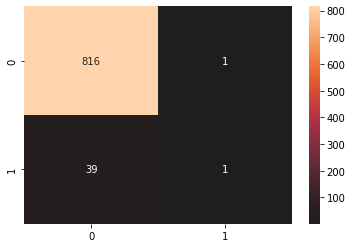

In [13]:
from sklearn.neighbors import KNeighborsClassifier

#through testing, n_neighbors > 5 returns 0 positive predictions and between [0,4], 2 yields the highest knn score
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train) 

KNNpred = knn.predict(x_test)

knncm = confusion_matrix(y_test, KNNpred)


print(classification_report(y_test, KNNpred))
print(knn.score(x_test, y_test))

knnhm = sns.heatmap(knncm, center = True, annot=True, fmt='g', square=False)



              precision    recall  f1-score   support

           0       0.95      1.00      0.97       817
           1       0.20      0.03      0.04        40

    accuracy                           0.95       857
   macro avg       0.58      0.51      0.51       857
weighted avg       0.92      0.95      0.93       857



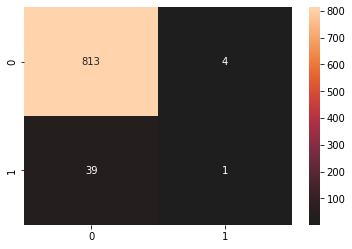

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

pred = mlp.predict(x_test)

nnrelucm = confusion_matrix(y_test,pred)

print(classification_report(y_test,pred))

nnreluhm = sns.heatmap(nnrelucm, center = True, annot=True, fmt='g', square=False)


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       817
           1       0.00      0.00      0.00        40

    accuracy                           0.95       857
   macro avg       0.48      0.50      0.49       857
weighted avg       0.91      0.95      0.93       857



C:\Users\awsom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


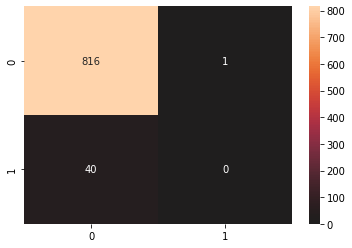

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='tanh', solver='adam', max_iter=3500)
mlp.fit(x_train,y_train)

pred = mlp.predict(x_test)

nntanhcm = confusion_matrix(y_test, pred)

print(classification_report(y_test, pred))

nntanhhm = sns.heatmap(nntanhcm, center = True, annot=True, fmt='g', square=False)
